<a href="https://colab.research.google.com/github/crzysab/Data-Covid19-using-Python/blob/main/Covid19_SumateraUtara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

In [2]:
resp

<Response [200]>

In [6]:
resp.headers

{'Server': 'nginx', 'Date': 'Mon, 06 Sep 2021 03:30:34 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 06 Sep 2021 03:29:13 GMT', 'ETag': 'W/"61358b09-3443b"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}

In [8]:
cov_id_raw = resp.json()
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [14]:
cov_id_update.keys()

dict_keys(['penambahan', 'harian', 'total'])

In [15]:
print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh  :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal  :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini  :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini  :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2021-09-05
Jumlah penambahan kasus sembuh  : 10191
Jumlah penambahan kasus meninggal  : 392
Jumlah total kasus positif hingga saat ini  : 4129020
Jumlah total kasus meninggal hingga saat ini  : 135861


In [21]:
resp_sumut = requests.get('https://data.covid19.go.id/public/api/prov_detail_SUMATERA_UTARA.json')
cov_sumut_raw = resp_sumut.json()

In [23]:
resp_sumut

<Response [200]>

In [25]:
for item in cov_sumut_raw.keys() :
  print(item)

last_date
provinsi
kasus_total
kasus_tanpa_tgl
kasus_dengan_tgl
meninggal_persen
meninggal_tanpa_tgl
meninggal_dengan_tgl
sembuh_persen
sembuh_tanpa_tgl
sembuh_dengan_tgl
list_perkembangan
data


In [26]:
cov_sumut_raw['kasus_total']

97740

In [29]:
print('\nJumlah total kasus COVID-19 di Sumatera Utara                 : %d' %cov_sumut_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Sumatera Utara         : %f.2%%' %cov_sumut_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Sumatera Utara : %f.2%%' %cov_sumut_raw['sembuh_persen'])


Jumlah total kasus COVID-19 di Sumatera Utara                 : 97740
Persentase kematian akibat COVID-19 di Sumatera Utara         : 2.488234.2%
Persentase tingkat kesembuhan dari COVID-19 di Sumatera Utara : 78.283200.2%


In [34]:
import numpy as np
import pandas as pd

cov_sumut = pd.DataFrame(cov_sumut_raw['list_perkembangan'])
print('Info cov_sumut:\n', cov_sumut.info())
print('\nLima data teratas cov_sumut:\n', cov_sumut.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       535 non-null    int64
 1   KASUS                         535 non-null    int64
 2   MENINGGAL                     535 non-null    int64
 3   SEMBUH                        535 non-null    int64
 4   DIRAWAT_OR_ISOLASI            535 non-null    int64
 5   AKUMULASI_KASUS               535 non-null    int64
 6   AKUMULASI_SEMBUH              535 non-null    int64
 7   AKUMULASI_MENINGGAL           535 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  535 non-null    int64
dtypes: int64(9)
memory usage: 37.7 KB
Info cov_sumut:
 None

Lima data teratas cov_sumut:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1584403200000      1  ...                    1                             0
1  1584489600000 

In [42]:
import numpy as np
import pandas as pd

cov_sumut_tidy = (cov_sumut.drop(columns=[item for item in cov_sumut.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sumut_tidy['tanggal'] = pd.to_datetime(cov_sumut_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_sumut_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-17           1          1       0
1 2020-03-18           0          0       0
2 2020-03-19           0          0       0
3 2020-03-20           0          0       0
4 2020-03-21           0          0       0


In [46]:
cov_jabar_tidy.columns

Index(['tanggal', 'kasus_baru', 'meninggal', 'sembuh'], dtype='object')

<BarContainer object of 535 artists>

<Figure size 432x288 with 0 Axes>

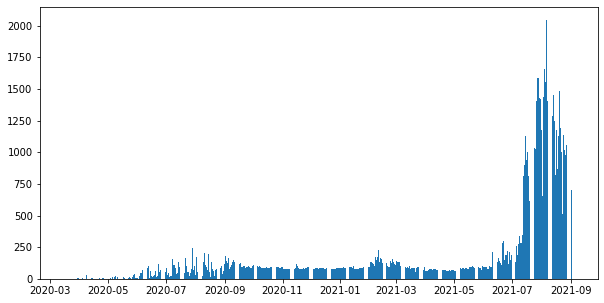

In [66]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sumut_tidy, x='tanggal', height='kasus_baru')

<Figure size 432x288 with 0 Axes>

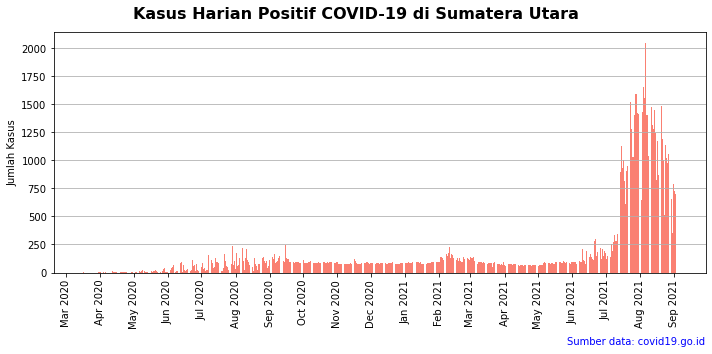

In [64]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sumut_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle("Kasus Harian Positif COVID-19 di Sumatera Utara", 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title(" ",fontsize=10)
ax.set_xlabel('')
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.3, "Sumber data: covid19.go.id", color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

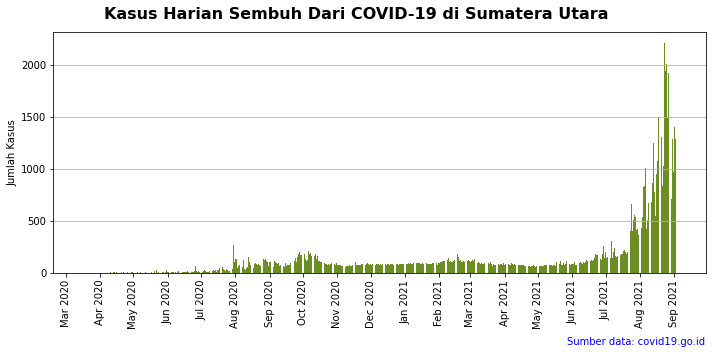

In [65]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sumut_tidy, x='tanggal', height='sembuh', color='olivedrab')
fig.suptitle("Kasus Harian Sembuh Dari COVID-19 di Sumatera Utara", 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title(" ",fontsize=10)
ax.set_xlabel('')
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.3, "Sumber data: covid19.go.id", color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

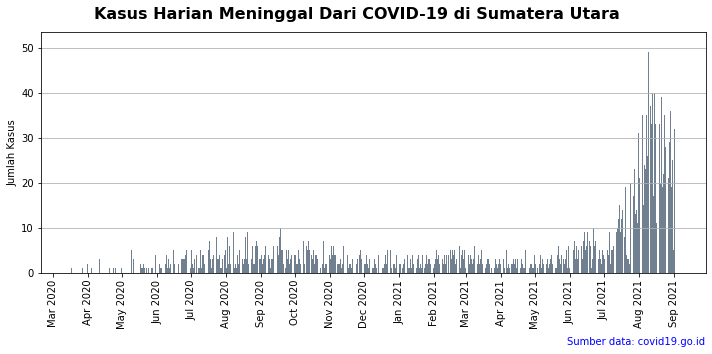

In [67]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sumut_tidy, x='tanggal', height='meninggal', color='slategrey')
fig.suptitle("Kasus Harian Meninggal Dari COVID-19 di Sumatera Utara", 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title(" ",fontsize=10)
ax.set_xlabel('')
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.3, "Sumber data: covid19.go.id", color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()